In [1]:
import pandas as pd
import numpy as np
from pyalex import Works
import pyalex
pyalex.config.email = "tarakomarecity@gmail.com"

flatten2 = lambda l: [item for sublist in l if sublist == sublist for item in sublist]

In [2]:
pager = Works().filter(concepts={"id": "C160145156"})\
            .select(["id", "title", "publication_year", "authorships", "referenced_works"]).paginate(per_page=200, n_max=None)

works_json = []
for page in pager:
    for item in page:
        works_json.append(item)
    print(len(works_json))


200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
2600
2800
3000
3200
3400
3600
3800
4000
4200
4400
4600
4800
5000
5200
5400
5600
5800
6000
6200
6400
6600
6800
7000
7200
7400
7600
7800
8000
8200
8400
8600
8800
9000
9200
9400
9600
9800
10000
10200
10400
10600
10800
11000
11200
11400
11600
11800
12000
12200
12400
12600
12800
13000
13200
13400
13600
13800
14000
14200
14400
14600
14800
15000
15200
15400
15600
15800
16000
16200
16400
16600
16800
17000
17200
17400
17600
17800
18000
18200
18400
18600
18800
19000
19200
19400
19600
19800
20000
20200
20221
20221


In [3]:
works_json

[{'id': 'https://openalex.org/W2137015675',
  'title': 'Clustal W and Clustal X version 2.0',
  'publication_year': 2007,
  'authorships': [{'author_position': 'first',
    'author': {'id': 'https://openalex.org/A5044561793',
     'display_name': 'Mark A. Larkin',
     'orcid': None},
    'institutions': [{'id': 'https://openalex.org/I1303153112',
      'display_name': 'European Bioinformatics Institute',
      'ror': 'https://ror.org/02catss52',
      'country_code': 'GB',
      'type': 'facility',
      'lineage': ['https://openalex.org/I1303153112',
       'https://openalex.org/I4210138560']},
     {'id': 'https://openalex.org/I4210138560',
      'display_name': 'European Molecular Biology Laboratory',
      'ror': 'https://ror.org/03mstc592',
      'country_code': 'DE',
      'type': 'government',
      'lineage': ['https://openalex.org/I4210138560']},
     {'id': 'https://openalex.org/I100930933',
      'display_name': 'University College Dublin',
      'ror': 'https://ror.org/05m

In [4]:
years = pd.Series(
    {work['id']: work['publication_year'] for work in works_json},
    name='year'
)
years.index.name = 'eid'

citations_data = []
for work in works_json:
    target_id = work['id']
    for referenced_work in work['referenced_works']:
        citations_data.append({'source': referenced_work, 'target': target_id})
citations_df = pd.DataFrame(citations_data)

team_sizes = pd.Series(
    {work['id']: len(work['authorships']) for work in works_json},
    name='team_size'
)
team_sizes.index.name = 'eid'

display(years, citations_df, team_sizes)

eid
https://openalex.org/W2137015675    2007
https://openalex.org/W2161444534    2001
https://openalex.org/W2133520037    2010
https://openalex.org/W2158782408    2012
https://openalex.org/W2146411229    2014
                                    ... 
https://openalex.org/W62858194      1993
https://openalex.org/W75567179      1993
https://openalex.org/W829551024     1993
https://openalex.org/W856532963     1993
https://openalex.org/W93749299      1993
Name: year, Length: 20220, dtype: int64

source                            target
0       https://openalex.org/W1965973697  https://openalex.org/W2137015675
1       https://openalex.org/W2094031081  https://openalex.org/W2137015675
2       https://openalex.org/W2097382368  https://openalex.org/W2137015675
3       https://openalex.org/W2106258670  https://openalex.org/W2137015675
4       https://openalex.org/W2106882534  https://openalex.org/W2137015675
...                                  ...                               ...
218696  https://openalex.org/W1976263807    https://openalex.org/W62858194
218697  https://openalex.org/W2003150360    https://openalex.org/W62858194
218698  https://openalex.org/W2021269535    https://openalex.org/W62858194
218699  https://openalex.org/W2083709696    https://openalex.org/W62858194
218700  https://openalex.org/W2108310737    https://openalex.org/W62858194

[218701 rows x 2 columns]

eid
https://openalex.org/W2137015675    13
https://openalex.org/W2161444534     2
https://openalex.org/W2133520037     3
https://openalex.org/W2158782408     3
https://openalex.org/W2146411229     5
                                    ..
https://openalex.org/W62858194       1
https://openalex.org/W75567179       1
https://openalex.org/W829551024      2
https://openalex.org/W856532963      1
https://openalex.org/W93749299       2
Name: team_size, Length: 20220, dtype: int64

In [5]:
def citation_groupby(df_citation):
    '''source,targetのDataFrameを引用先，引用元ごとにgroupby
    
    input: source,targetをcolumnにもつedgeのDataFrame

    index: eid
    source: indexが引用先となる論文群(新)
    target: indexが引用元となる論文群(旧)
    '''
    
    citations_source_gp = df_citation.groupby('source').agg(list)
    citations_target_gp = df_citation.groupby('target').agg(list)
    df_citation_gp = pd.concat([citations_source_gp,citations_target_gp],axis = 1)
    return df_citation_gp

citations_gb = citation_groupby(citations_df)
citations_gb

target  \
https://openalex.org/W1000499890  [https://openalex.org/W4280490099]   
https://openalex.org/W100076689   [https://openalex.org/W2494050351]   
https://openalex.org/W100098737    [https://openalex.org/W767853576]   
https://openalex.org/W1001015353  [https://openalex.org/W2101580524]   
https://openalex.org/W100105580   [https://openalex.org/W2093432835]   
...                                                              ...   
https://openalex.org/W991785886                                  NaN   
https://openalex.org/W992348267                                  NaN   
https://openalex.org/W992442129                                  NaN   
https://openalex.org/W992703325                                  NaN   
https://openalex.org/W99746906                                   NaN   

                                                                             source  
https://openalex.org/W1000499890                                                NaN  
https://openalex.org/W100076689                                                 NaN  
https://openalex.org/W100098737                                                 NaN  
https://openalex.org/W1001015353                                                NaN  
https://openalex.org/W100105580                                                 NaN  
...                                                                             ...  
https://openalex.org/W991785886   [https://openalex.org/W64760530, https://opena...  
https://openalex.org/W992348267   [https://openalex.org/W52862839, https://opena...  
https://openalex.org/W992442129   [https://openalex.org/W2663444, https://openal...  
https://openalex.org/W992703325   [https://openalex.org/W2109792874, https://ope...  
https://openalex.org/W99746906    [https://openalex.org/W1517093898, https://ope...  

[143618 rows x 2 columns]

In [6]:
def get_score(node):
    try:
        node_r = set(citations_gb.target.loc[node])
        node_r_c = set(flatten2([citations_gb.source.loc[x] for x in node_r])) - set([node])
        node_c = set(citations_gb.source.loc[node])
        allnodes = node_c | node_r_c
        cite_target = node_c - node_r_c
        cite_targetref = node_r_c - node_c
        cite_target_targetref_both = node_r_c & node_c
        score = (len(cite_target)*1 + len(cite_target_targetref_both)*-1 + len(cite_targetref)*0)/len(allnodes)
        return score
    except:
        return None

In [7]:
#eids = citations_gb.index

#from multiprocessing import Pool
#P = Pool(20)
#res = P.map(get_score,eids)
#P.terminate()
#P.close()
#scores = pd.DataFrame([[eid,re] for eid,re in zip(eids,res)])
#display(scores, scores[scores[1].notna()])

#scores.index = scores[0]
#scores['year'] = scores[0].map(years)
#display(scores)

In [8]:
eids = citations_gb.index

res = []
for eid in eids:
    res.append(get_score(eid))
scores = pd.DataFrame([[eid,re] for eid,re in zip(eids,res)])
display(scores, scores[scores[1].notna()])

scores.index = scores[0]
scores['team_size'] = scores[0].map(team_sizes)
display(scores)

0   1
0       https://openalex.org/W1000499890 NaN
1        https://openalex.org/W100076689 NaN
2        https://openalex.org/W100098737 NaN
3       https://openalex.org/W1001015353 NaN
4        https://openalex.org/W100105580 NaN
...                                  ...  ..
143613   https://openalex.org/W991785886 NaN
143614   https://openalex.org/W992348267 NaN
143615   https://openalex.org/W992442129 NaN
143616   https://openalex.org/W992703325 NaN
143617    https://openalex.org/W99746906 NaN

[143618 rows x 2 columns]

0         1
41      https://openalex.org/W1008499552  0.134615
67      https://openalex.org/W1015370704  0.196970
96      https://openalex.org/W1020481212  0.555556
116     https://openalex.org/W1025088682 -0.013514
226      https://openalex.org/W106527996  0.437500
...                                  ...       ...
132193   https://openalex.org/W941602827  0.692308
132198    https://openalex.org/W94228666 -0.014815
132214    https://openalex.org/W94602657  0.333333
132413   https://openalex.org/W995370299  0.205882
132427   https://openalex.org/W999459616  0.714286

[3491 rows x 2 columns]

0   1  \
0                                                                        
https://openalex.org/W1000499890  https://openalex.org/W1000499890 NaN   
https://openalex.org/W100076689    https://openalex.org/W100076689 NaN   
https://openalex.org/W100098737    https://openalex.org/W100098737 NaN   
https://openalex.org/W1001015353  https://openalex.org/W1001015353 NaN   
https://openalex.org/W100105580    https://openalex.org/W100105580 NaN   
...                                                            ...  ..   
https://openalex.org/W991785886    https://openalex.org/W991785886 NaN   
https://openalex.org/W992348267    https://openalex.org/W992348267 NaN   
https://openalex.org/W992442129    https://openalex.org/W992442129 NaN   
https://openalex.org/W992703325    https://openalex.org/W992703325 NaN   
https://openalex.org/W99746906      https://openalex.org/W99746906 NaN   

                                  team_size  
0                                            
https://openalex.org/W1000499890        NaN  
https://openalex.org/W100076689         NaN  
https://openalex.org/W100098737         NaN  
https://openalex.org/W1001015353        NaN  
https://openalex.org/W100105580         NaN  
...                                     ...  
https://openalex.org/W991785886         2.0  
https://openalex.org/W992348267         4.0  
https://openalex.org/W992442129         3.0  
https://openalex.org/W992703325         4.0  
https://openalex.org/W99746906          1.0  

[143618 rows x 3 columns]

In [9]:
scores_notna = scores[scores[1].notna() & scores['team_size'].notna()].drop(columns=0)
scores_notna

1  team_size
0                                                    
https://openalex.org/W1008499552  0.134615        2.0
https://openalex.org/W1015370704  0.196970        6.0
https://openalex.org/W1020481212  0.555556        2.0
https://openalex.org/W1025088682 -0.013514        5.0
https://openalex.org/W106527996   0.437500        3.0
...                                    ...        ...
https://openalex.org/W941602827   0.692308        4.0
https://openalex.org/W94228666   -0.014815        3.0
https://openalex.org/W94602657    0.333333        4.0
https://openalex.org/W995370299   0.205882        3.0
https://openalex.org/W999459616   0.714286        4.0

[3491 rows x 2 columns]

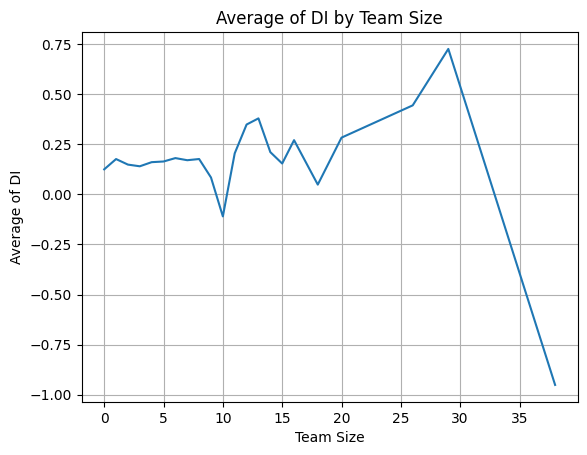

In [10]:
import matplotlib.pyplot as plt

# team_sizeごとにグループ化
grouped_df = scores_notna.groupby('team_size').mean()

# グラフの描画
plt.plot(grouped_df.index, grouped_df[1])
plt.xlabel('Team Size')
plt.ylabel('Average of DI')
plt.title('Average of DI by Team Size')
plt.grid(True)
plt.show()